# <u>**Capstone** **Project: Infosys Springboard**</u>

## **Title    : <u>Exploratory Data Analysis and Machine Learning Model of Covid-19 Dataset.</u>**
## Name       : Jayasoruban R
## Roll No    : 2019104015
## Department : Electrical and Electronics Engineering
## Course     : Machine Learning with applications to object recognition


Description: 
The COVID-19 pandemic in India is a part of the worldwide pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). As of 3 November 2022, according to Indian government figures, India has the second-highest number of confirmed cases in the world (after the United States of America) with 44,655,926 reported cases of COVID-19 infection and the third-highest number of COVID-19 deaths (after the United States and Brazil) at 530,461 deaths. In May 2022, the World Health Organization estimated 4.7 million excess deaths, both directly and indirectly related to COVID-19 to have taken place in India.

# <u>Table of Contents: </u>



1.   Installing and Importing the necessary libraries<br>
  1.1 Necessary Imports

2.   Exploratory Data Analysis of Covid-19 Dataset<br>
  2.1 Checking dataset exists or not in the directory<br>
  2.2 EDA of the DataFrame<br>
  2.3 Checking the shape, Null or Empty Values and the data types<br>
  2.4 Cleaning the Data Frame.<br>

3. Plotting the Covid DataPoints<br>
  3.1 Total Active and categorical Cases<br>
  3.2 Total Weekly Active Cases<br>
  3.3 Total Daily Active Cases<br>
  3.4 Top Countries with the Most Cases<br>

4. Analysis for India and China<br>
  4.1 Indian Covid-19 Analysis<br>
  4.2 Chinese Covid-19 Analysis<br>



#### <u>1. Installing and Importing the necessary libraries</u>

In [455]:
#1.1 The Necessary Imports for the Covid 19 Capstone project
## Numerical Computing and DataFrame Imports
import numpy as np
import pandas as pd

## Plotting and Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

# Machine Learning Model, Training Imports and Validation
from sklearn.model_selection import train_test_split,TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

# Deep Learning Libraries
import tensorflow as tf

#### <u>2. Exploratory Data Analysis of Covid-19 Dataset</u>

In [492]:
#2.1 Exploratory Data Analysis of Covid-19 Dataset

# Confirming the dataset 
import os
check_dataset = [i=='Covid_Dataset.csv' for i in os.listdir()].count(True)
if(check_dataset == 1):
  print("The Covid 19 Dataset exists in the same directory")


The Covid 19 Dataset exists in the same directory


In [457]:

#2.2 EDA of the Dataset

df = pd.read_csv("Covid_Dataset.csv")
df.tail(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
18317,18318,04/24/2020,Virginia,US,2020-04-25 06:31:19,11594.0,411.0,0.0
18318,18319,04/24/2020,Washington,US,2020-04-25 06:31:19,12977.0,722.0,0.0
18319,18320,04/24/2020,West Virginia,US,2020-04-25 06:31:19,1010.0,32.0,0.0
18320,18321,04/24/2020,Western Australia,Australia,2020-04-25 06:31:19,548.0,8.0,340.0
18321,18322,04/24/2020,Wisconsin,US,2020-04-25 06:31:19,5356.0,263.0,0.0
18322,18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18323,18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18324,18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0
18325,18326,04/24/2020,Yunnan,Mainland China,2020-04-25 06:31:19,185.0,2.0,180.0
18326,18327,04/24/2020,Zhejiang,Mainland China,2020-04-25 06:31:19,1268.0,1.0,1256.0


In [458]:
# Total Datapoints present in the Dataset
print("Total Number of Measurements",df.size)

Total Number of Measurements 146616


In [459]:
#2.3 Checking the shape, Null or Empty Values and the data types

print("shape: ",df.shape,'\n')

print("Null Values:\n")
print(df.isnull().sum(),'\n')

print("Data Types of Each Column: \n")
print(df.dtypes)

shape:  (18327, 8) 

Null Values:

SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64 

Data Types of Each Column: 

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [460]:
#2.4 Cleaning the DataFrame
df.drop("SNo",axis=1,inplace=True)

In [461]:
# Checking the NULL Values present in the Dataset
max_null = df.isnull().sum().max()
print("The maximum number of NULL Values: ",max_null)

The maximum number of NULL Values:  9277


In [462]:
# Checking all the Countries present in the Dataset
countries = df['Country/Region'].unique()
print("The Total number of countries in the Dataset: ",countries.size)
print(countries[:70])

The Total number of countries in the Dataset:  220
['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic']


In [463]:
# Maximum measured Country
print("Top countries with maximum measurements: ")
df['Country/Region'].value_counts()[:10]

Top countries with maximum measurements: 


US                3540
Mainland China    2912
Canada             728
Australia          588
France             477
UK                 431
Netherlands        195
Denmark            140
Hong Kong           94
South Korea         94
Name: Country/Region, dtype: int64

In [464]:
from pandas.core.reshape.tile import to_datetime
#Making the Date to suit the Inbuilt Datetime format

df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [465]:
x = df.groupby(['ObservationDate']).sum()
print("Total Confirmed cases as of the Last date worldwide: ",x['Confirmed'][-1])
print("Total Death cases as of the Last date worldwide : ",x['Deaths'][-1])
print("Total Recovered cases as of the Last date worldwide : ",x['Recovered'][-1])

Total Confirmed cases as of the Last date worldwide:  2811193.0
Total Death cases as of the Last date worldwide :  197159.0
Total Recovered cases as of the Last date worldwide :  793601.0


#### <u>3. Plotting the Covid-19 Datapoints</u>

Text(0, 0.5, 'Active')

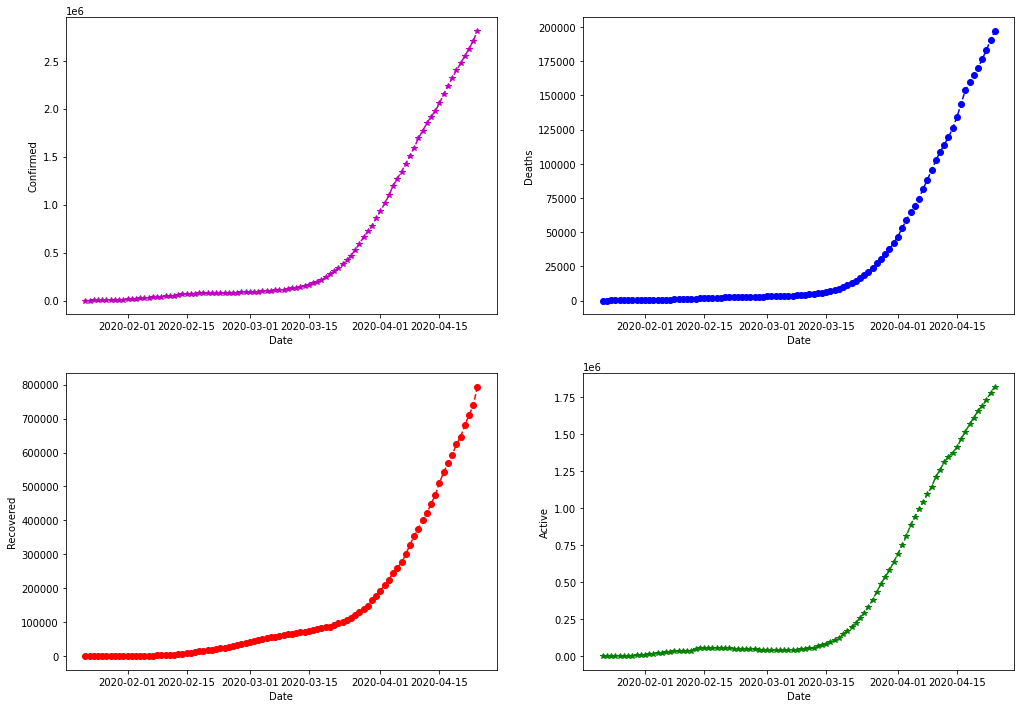

In [466]:
# Plotting the Total Number of Active cases daily from the Start of measurement
fig,axes = plt.subplots(2,2,figsize=(17,12))
x = df.groupby(['ObservationDate']).sum().index

y1 = df.groupby(['ObservationDate']).sum()['Confirmed']
y2 = df.groupby(['ObservationDate']).sum()['Deaths']
y3 = df.groupby(['ObservationDate']).sum()['Recovered']
y4 = y1 - y2 - y3

axes[0,0].plot(x,y1,'m--*')
axes[0,1].plot(x,y2,'b--o')
axes[1,0].plot(x,y3,'r--o')
axes[1,1].plot(x,y4,'g--*')

axes[0,0].set_xlabel('Date')
axes[0,1].set_xlabel('Date')
axes[1,0].set_xlabel('Date')
axes[1,1].set_xlabel('Date')

axes[0,0].set_ylabel('Confirmed')
axes[0,1].set_ylabel('Deaths')
axes[1,0].set_ylabel('Recovered')
axes[1,1].set_ylabel('Active')

In [467]:
week = df.groupby(['ObservationDate']).sum().index.isocalendar().week

y1 = df.groupby(['ObservationDate']).sum()['Confirmed']
y2 = df.groupby(['ObservationDate']).sum()['Deaths']
y3 = df.groupby(['ObservationDate']).sum()['Recovered']

week_wise_confirmed = []
week_wise_deaths = []
week_wise_recovered = []

check = week[0]
cases_sum = 0
for i,j in zip(week,y1):
  if(i!=check):
    check = i
    week_wise_confirmed.append(cases_sum)
    cases_sum = 0
  cases_sum += j
week_wise_confirmed.append(cases_sum)

check = week[0]
cases_sum = 0
for i,j in zip(week,y2):
  if(i!=check):
    check = i
    week_wise_deaths.append(cases_sum)
    cases_sum = 0
  cases_sum += j
week_wise_deaths.append(cases_sum)

check = week[0]
cases_sum = 0
for i,j in zip(week,y3):
  if(i!=check):
    check = i
    week_wise_recovered.append(cases_sum)
    cases_sum = 0
  cases_sum += j
week_wise_recovered.append(cases_sum)




In [468]:
weeks = []
for i in week:
  if(i not in weeks):
    weeks.append(i)
weeks

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

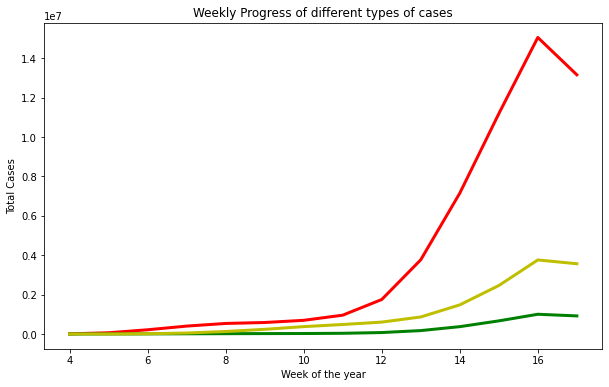

In [469]:
#Weekly Plots
plt.figure(figsize=(10,6))
plt.plot(weeks,week_wise_confirmed,linewidth=3,color='r')
plt.plot(weeks,week_wise_deaths,linewidth =3,color='g')
plt.plot(weeks,week_wise_recovered,linewidth = 3,color='y')
plt.xlabel("Week of the year")
plt.ylabel("Total Cases")
plt.title("Weekly Progress of different types of cases")
plt.show()

Text(0, 0.5, 'Death Cases')

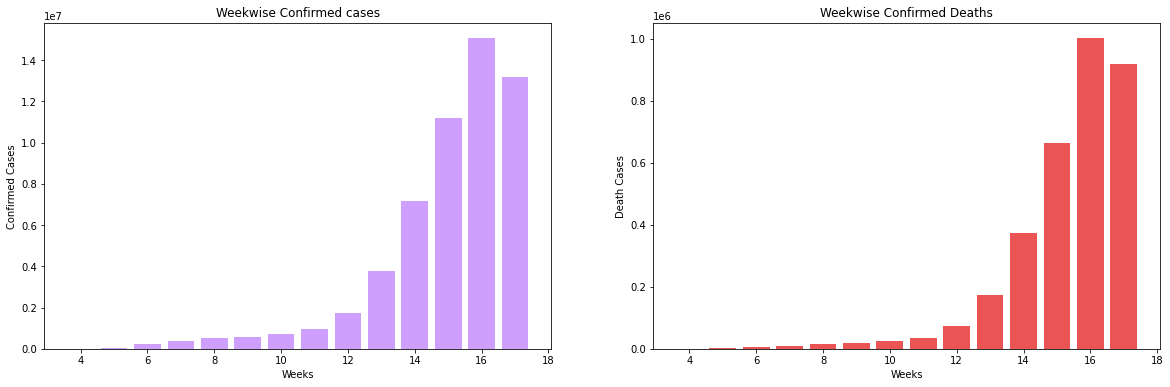

In [470]:
fig,axes = plt.subplots(1,2,figsize=(20,6),squeeze=False)
axes[0,0].bar(weeks,week_wise_confirmed,color='#CE9FFC')
axes[0,1].bar(weeks,week_wise_deaths,color='#EA5455')

axes[0,0].set_title("Weekwise Confirmed cases")
axes[0,0].set_xlabel('Weeks')
axes[0,0].set_ylabel('Confirmed Cases')

axes[0,1].set_title("Weekwise Confirmed Deaths")
axes[0,1].set_xlabel('Weeks')
axes[0,1].set_ylabel('Death Cases')


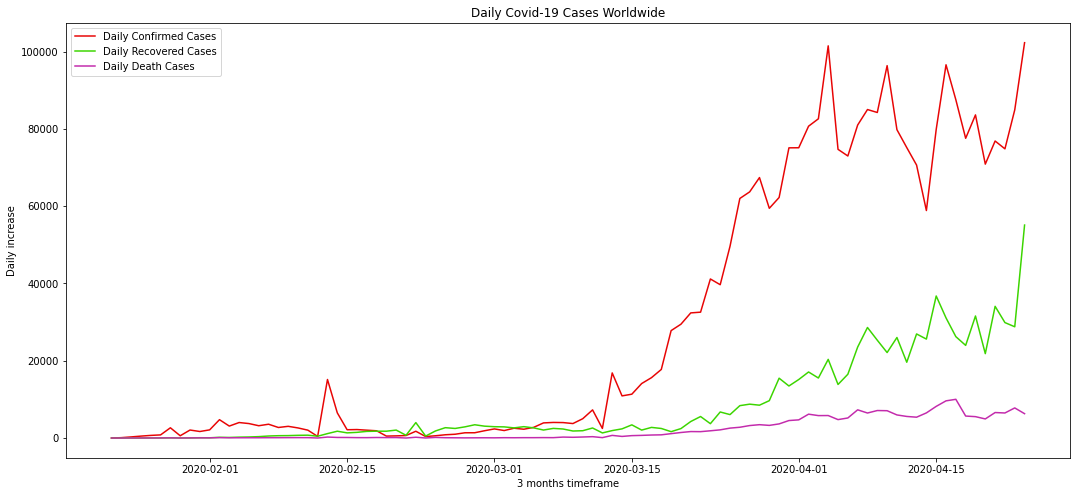

In [471]:
plt.figure(figsize=(18,8))
plt.plot( df.groupby(['ObservationDate']).sum()['Confirmed'].diff().fillna(0),label="Daily Confirmed Cases",color='#E80505')
plt.plot( df.groupby(['ObservationDate']).sum()['Recovered'].diff().fillna(0),label="Daily Recovered Cases",color='#3CD500')
plt.plot( df.groupby(['ObservationDate']).sum()['Deaths'].diff().fillna(0),label="Daily Death Cases",color='#C32BAC')
plt.xlabel("3 months timeframe")
plt.ylabel("Daily increase")
plt.title("Daily Covid-19 Cases Worldwide")
plt.legend()
plt.show()

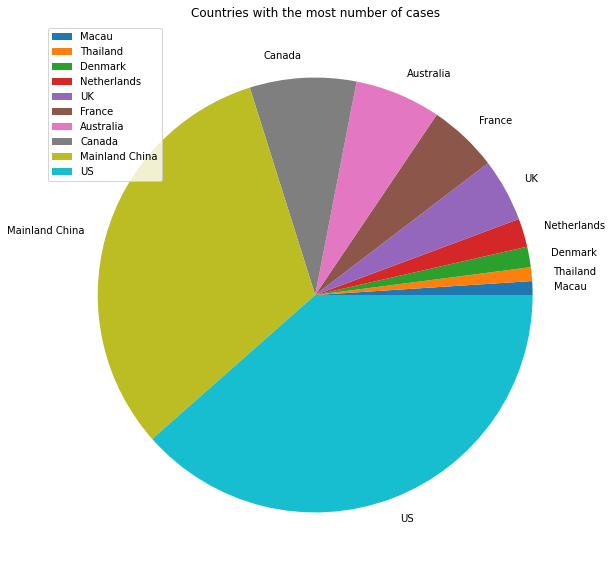

In [472]:
#Top Countries with the most number of Cases and Deaths

plt.figure(figsize=(20,10))
x = df['Country/Region'].value_counts().sort_values()[-10:].index
y = df['Country/Region'].value_counts().sort_values()[-10:]

plt.pie(y,labels=x)
plt.title("Countries with the most number of cases")
plt.legend()
plt.show()


#### <u>3. Analysis for India and China</u>

The Trend in India in terms of the cases and Deaths seems to Increase but the recovery rate is also considerebly good comparitively


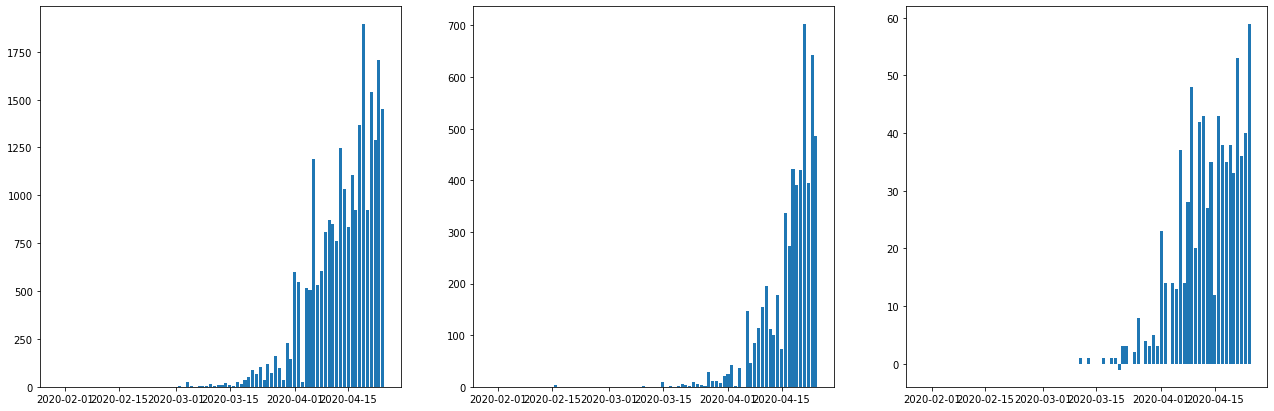

In [473]:
# Checking the Confirmed, Recovered and Deaths for Indian Standpoint View
Indian_cases = df[df['Country/Region']=='India']
x = Indian_cases.groupby(['ObservationDate']).sum().index
y = Indian_cases.groupby(['ObservationDate']).sum().diff().fillna(0)

fig,axes = plt.subplots(1,3,figsize=(22,7),squeeze=False)
axes[0,0].bar(x,y['Confirmed'])
axes[0,1].bar(x,y['Recovered'])
axes[0,2].bar(x,y['Deaths'])

print("The Trend in India in terms of the cases and Deaths seems to Increase but the recovery rate is also considerebly good comparitively")

The Trend in China in terms of the cases and Deaths seems to Increase and Decrease drastically and has a good recovery rate compared to India


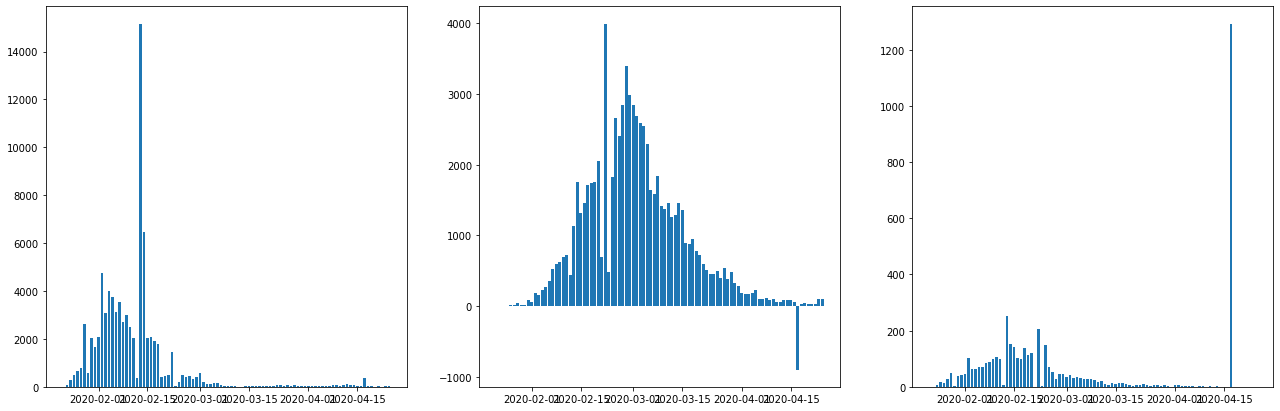

In [474]:
# Checking the Confirmed, Recovered and Deaths for Chinese Standpoint View
Indian_cases = df[df['Country/Region']=='Mainland China']
x = Indian_cases.groupby(['ObservationDate']).sum().index
y = Indian_cases.groupby(['ObservationDate']).sum().diff().fillna(0)

fig,axes = plt.subplots(1,3,figsize=(22,7),squeeze=False)
axes[0,0].bar(x,y['Confirmed'])
axes[0,1].bar(x,y['Recovered'])
axes[0,2].bar(x,y['Deaths'])

print("The Trend in China in terms of the cases and Deaths seems to Increase and Decrease drastically and has a good recovery rate compared to India")

#5. <u> Machine Learning Model Development </u>

In [475]:
covid_sum_num = df['Confirmed'] + df['Deaths'] + df['Recovered']
covid_sum_den = 3*((1/df['Confirmed']) + (1/df['Deaths'])+ (1/df['Recovered']))

df['covid_close'] = covid_sum_num / covid_sum_den

In [476]:
df = df[df['covid_close'] != 0]

In [477]:
df = df.drop(['ObservationDate','Province/State','Country/Region','Last Update'],axis=1)
df. reset_index (inplace= True)

In [478]:
df

,index,Confirmed,Deaths,Recovered,covid_close
0,13,444.0,17.0,28.0,1684.057098
1,51,444.0,17.0,28.0,1684.057098
2,84,549.0,24.0,31.0,2657.998255
3,125,761.0,40.0,32.0,4823.611547
4,169,1058.0,52.0,42.0,8730.155142
...,...,...,...,...,...
7335,18315,1343.0,16.0,1172.0,13162.169186
7336,18320,548.0,8.0,340.0,2301.578846
7337,18323,76.0,3.0,73.0,140.666555
7338,18325,185.0,2.0,180.0,239.418160


In [479]:
#Set Target Variable
output_var = pd.DataFrame(df['covid_close'])
#Selecting the Features
features = ['Confirmed','Deaths']

In [480]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Confirmed,Deaths
0,0.002007,0.000616
1,0.002007,0.000616
2,0.002485,0.000886
3,0.003449,0.001502
4,0.004801,0.001964


In [481]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [482]:
X_test

,Confirmed,Deaths
6673,0.029714,0.000308
6674,0.042041,0.019139
6675,0.240079,0.017522
6676,0.002152,0.001502
6677,0.052912,0.004159
...,...,...
7335,0.006098,0.000578
7336,0.002480,0.000270
7337,0.000332,0.000077
7338,0.000828,0.000039


In [483]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], X_test.shape[1])

# <u>Machine Learning Models and Deep Learning Models used for Prediction</u>


1.   Linear Regression
2.   Quadratic Regression
3.   KNN (K Nearest Neighbour)
4.   LSTM Model (Long Short Term Memory)



In [484]:
## Linear Regression and Quadratic Regression

Linear_Regression = LinearRegression(n_jobs=-1)
Linear_Regression.fit(X_train,y_train)

Quadratic_Regression_2 = make_pipeline(PolynomialFeatures(2),Ridge())
Quadratic_Regression_2.fit(X_train,y_train)

Quadratic_Regression_3 = make_pipeline(PolynomialFeatures(3),Ridge())
Quadratic_Regression_3.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [485]:
## K Nearest Neighbours
# KNN Regression
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [486]:
# Support Vector Machine
SVC = SVR(kernel = 'linear',gamma = 'scale', shrinking = False,)
SVC.fit(X_train, y_train)

SVR(kernel='linear', shrinking=False)

In [487]:
#Machine Learning Metrics

LinearRegression_Score       = Linear_Regression.score(X_test,y_test)
Quadratic_Regression_2_Score = Quadratic_Regression_2.score(X_test,y_test)
Quadratic_Regression_3_Score = Quadratic_Regression_3.score(X_test,y_test)
KNN_Score                    = KNN.score(X_test, y_test)
SVM_Score                    = SVC.score(X_test, y_test)

In [488]:
print('LinearRegression_Score : ',LinearRegression_Score*100 )
print('Quadratic_Regression_2_Score: ',Quadratic_Regression_2_Score*100)
print('Quadratic_Regression_3_Score: ',Quadratic_Regression_3_Score*100)
print('KNN_Score: ',KNN_Score*100)
print('SVM_Score ',SVM_Score*100 )

LinearRegression_Score :  84.21115918630255
Quadratic_Regression_2_Score:  96.93845089795987
Quadratic_Regression_3_Score:  99.0677289638927
KNN_Score:  98.29562374866305
SVM_Score  -2.256830485903216


In [489]:
# Deep Learning Model
X_train = trainX.reshape(X_train.shape[0],1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0],1, X_test.shape[1])

In [490]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')
history=model.fit(X_train, y_train, epochs=10, batch_size=8, verbose=1, shuffle=False)

Epoch 1/10
835/835 [==============================] - 2s 2ms/step - loss: 6499415095246848.0000
Epoch 2/10
835/835 [==============================] - 2s 2ms/step - loss: 6499415095246848.0000
Epoch 3/10
835/835 [==============================] - 2s 2ms/step - loss: 6499415095246848.0000
Epoch 4/10
835/835 [==============================] - 2s 2ms/step - loss: 6499414558375936.0000
Epoch 5/10
835/835 [==============================] - 2s 2ms/step - loss: 6499414021505024.0000
Epoch 6/10
835/835 [==============================] - 2s 2ms/step - loss: 6499414021505024.0000
Epoch 7/10
835/835 [==============================] - 2s 2ms/step - loss: 6499414021505024.0000
Epoch 8/10
835/835 [==============================] - 2s 2ms/step - loss: 6499412947763200.0000
Epoch 9/10
835/835 [==============================] - 2s 2ms/step - loss: 6499412947763200.0000
Epoch 10/10
835/835 [==============================] - 2s 2ms/step - loss: 6499411874021376.0000


In [491]:
y_pred = model.predict(X_test)


21/21 [==============================] - 0s 3ms/step


#Thank You